In [1]:
%load_ext autoreload

In [2]:
%autoreload 2
from AGN_plot import *

All variables set as e.g. krome_idx_H2
plot 'your_output' u 1:krome_idx_H2
 the offset is nkrome= 0


## Default Model

In [3]:
def plot_default(spe1,
                 spe2,
                 d=4,
                 ax=None,
                 color='#bdbdbd',
                 color_default='black',
                 label1=None,
                 label2=None,
                 tmin=1e0,
                 div=None,
                 label=None):
    if ax == None:
        f, ax = plt.subplots(figsize=(12, 8))
    if label1 == None:
        label1 = r'${}$'.format(latex_name(spe1))
    if label2 == None:
        label2 = r'${}$'.format(latex_name(spe2))

    j = str(d)
    Abu1 = Abu(j)
    t = Abu1.t
    arg = np.argwhere(t >= tmin)
    if div != None:
        Abu1.Div(div)
    diag1 = Abu1.abu[arg, eval('krome_idx_' + spe1)]
    diag2 = Abu1.abu[arg, eval('krome_idx_' + spe2)]
    ax.loglog(diag1, diag2, color=color, linewidth=3, label='X-ray')
    ax.scatter(diag1[-1], diag2[-1], color=color, s=500, marker='*')

    Abu2 = Abu('0' + str(d))
    if div != None:
        Abu2.Div(div)
    diag_stop1 = Abu2.abu[arg, eval('krome_idx_' + spe1)]
    diag_stop2 = Abu2.abu[arg, eval('krome_idx_' + spe2)]
    ax.loglog(diag_stop1,
              diag_stop2,
              color=color,
              linewidth=3,
              linestyle='--',
              label='X-ray removed')
    ax.scatter(diag_stop1[-1], diag_stop2[-1], color=color, s=500, marker='*')

    Abu3 = Abu('_inf')
    if div != None:
        Abu3.Div(div)
    diag_inf1 = Abu3.abu[arg, eval('krome_idx_' + spe1)]
    diag_inf2 = Abu3.abu[arg, eval('krome_idx_' + spe2)]
    ax.loglog(diag_inf1,
              diag_inf2,
              color=color_default,
              linewidth=3,
              linestyle='-.',
              label='No X-ray')
    ax.scatter(diag_inf1[-1],
               diag_inf2[-1],
               color=color_default,
               s=500,
               marker='*')

    ax.set_xlabel(r'$n(${}$)$'.format(label1) + '/' + Abu1.name_div,
                  fontsize=35)
    ax.set_ylabel(r'$n(${}$)$'.format(label2) + '/' + Abu2.name_div,
                  fontsize=35)

    lower1 = np.array([diag1.min(),
                       diag_stop1.min(),
                       diag_inf1.min()]).min() * 0.5
    upper1 = np.array([diag1.max(),
                       diag_stop1.max(),
                       diag_inf1.max()]).max() * 2
    ax.set_xlim(lower1, upper1)
    lower2 = np.array([diag2.min(),
                       diag_stop2.min(),
                       diag_inf2.min()]).min() * 0.5
    upper2 = np.array([diag2.max(),
                       diag_stop2.max(),
                       diag_inf2.max()]).max() * 2
    ax.set_ylim(lower2, upper2)

    if (label == 'Dust'):
        ax.text(x=lower1 * (upper1 / lower1)**(1 / 20),
                y=upper2 / (upper2 / lower2)**(1 / 20),
                s=label,
                fontsize=30,
                color=color_default,
                verticalalignment='top')
    else:
        ax.text(x=upper1 / (upper1 / lower1)**(1 / 20),
                y=lower2 * (upper2 / lower2)**(1 / 20),
                s=label,
                fontsize=30,
                color=color_default,
                verticalalignment='bottom',
                horizontalalignment='right')
        

    #ax.legend(loc=0, prop={'size': 20})
    #ax.set_xlim(Range)

In [4]:
def set_spine_color(ax, color):
    ax.spines['left'].set_color(color)
    ax.spines['bottom'].set_color(color)
    ax.spines['right'].set_color(color)
    ax.spines['top'].set_color(color)
    ax.xaxis.label.set_color(color)
    ax.tick_params(axis='x', colors=color)
    ax.yaxis.label.set_color(color)
    ax.tick_params(axis='y', colors=color)

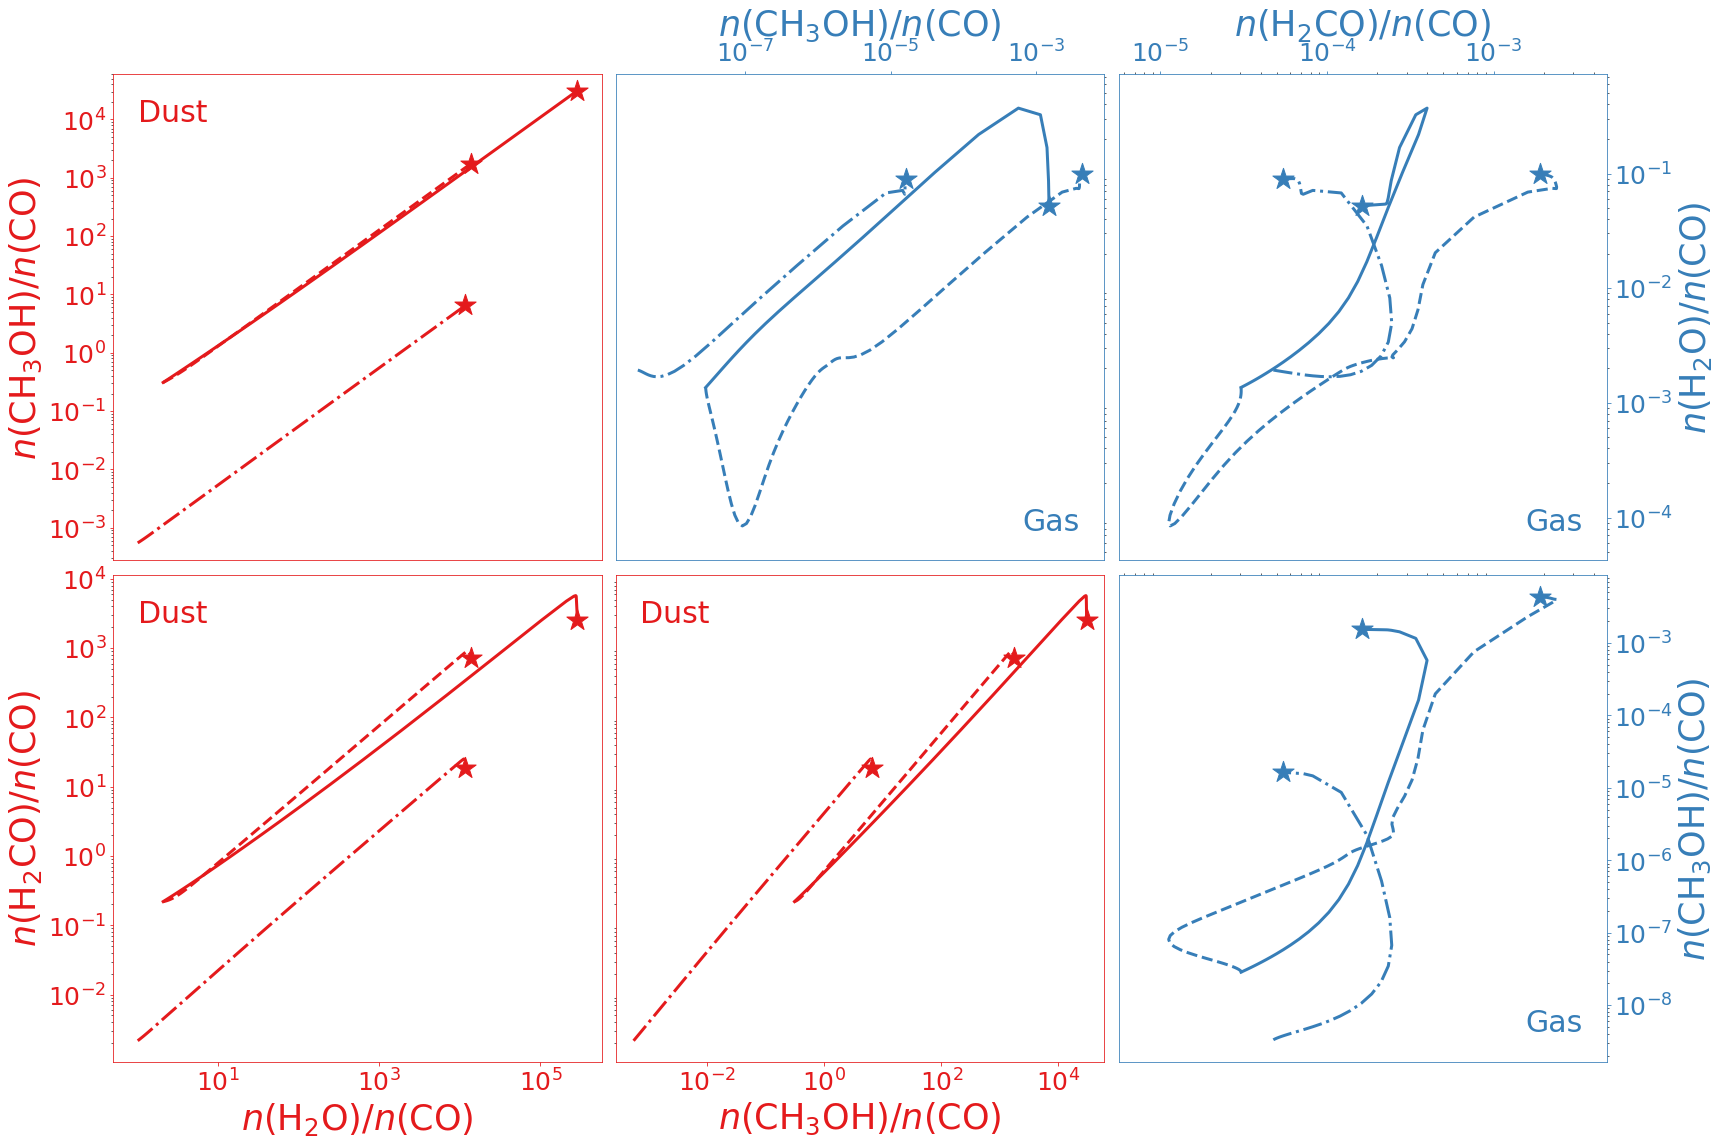

In [5]:
species = ['H2O', 'CH3OH', 'H2CO']
species_DUST = [
    'H_DUSTH_DUSTO_DUST', 'C_DUSTH_DUSTH_DUSTH_DUSTO_DUSTH_DUST',
    'H_DUSTH_DUSTC_DUSTO_DUST'
]

l = len(species)
f, ax = plt.subplots(l - 1, l, figsize=(8 * l, 8 * (l - 1)))
for i in np.arange(l - 1):
    for j in np.arange(l):
        if (i < j):
            spe1, spe2 = species[j], species[i]
            label1, label2 = None, None
            plot_default(spe1=spe1,
                         spe2=spe2,
                         ax=ax[i, j],
                         color='#377eb8',
                         color_default='#377eb8',
                         label1=label1,
                         label2=label2,
                         div='CO',
                         tmin=1e6,
                         label='Gas')
            ax[i, j].yaxis.set_label_position("right")
            ax[i, j].yaxis.tick_right()
            ax[i, j].xaxis.set_label_position("top")
            ax[i, j].xaxis.tick_top()
            set_spine_color(ax[i,j], '#377eb8')
        else:
            spe1, spe2 = species_DUST[j], species_DUST[i + 1]
            label1, label2 = r'${}$'.format(latex_name(
                species[j])), r'${}$'.format(latex_name(species[i + 1]))
            plot_default(spe1=spe1,
                         spe2=spe2,
                         ax=ax[i, j],
                         color='#e41a1c',
                         color_default='#e41a1c',
                         label1=label1,
                         label2=label2,
                         div='CO',
                         tmin=1e6,
                         label='Dust')
            set_spine_color(ax[i,j], '#e41a1c')
            
            

        if (0 < i < l - 2 or (i == 0 and j == 0)
                or (i == l - 2 and j == l - 1)):
            ax[i, j].set_xticks([])
            ax[i, j].set_xlabel('')

        if (0 < j < l - 1):
            ax[i, j].set_yticks([])
            ax[i, j].set_ylabel('')
        ax[i, j].tick_params(labelsize=25)

plt.tight_layout()
plt.savefig('../../../Report/Fig/diagnostic.eps')

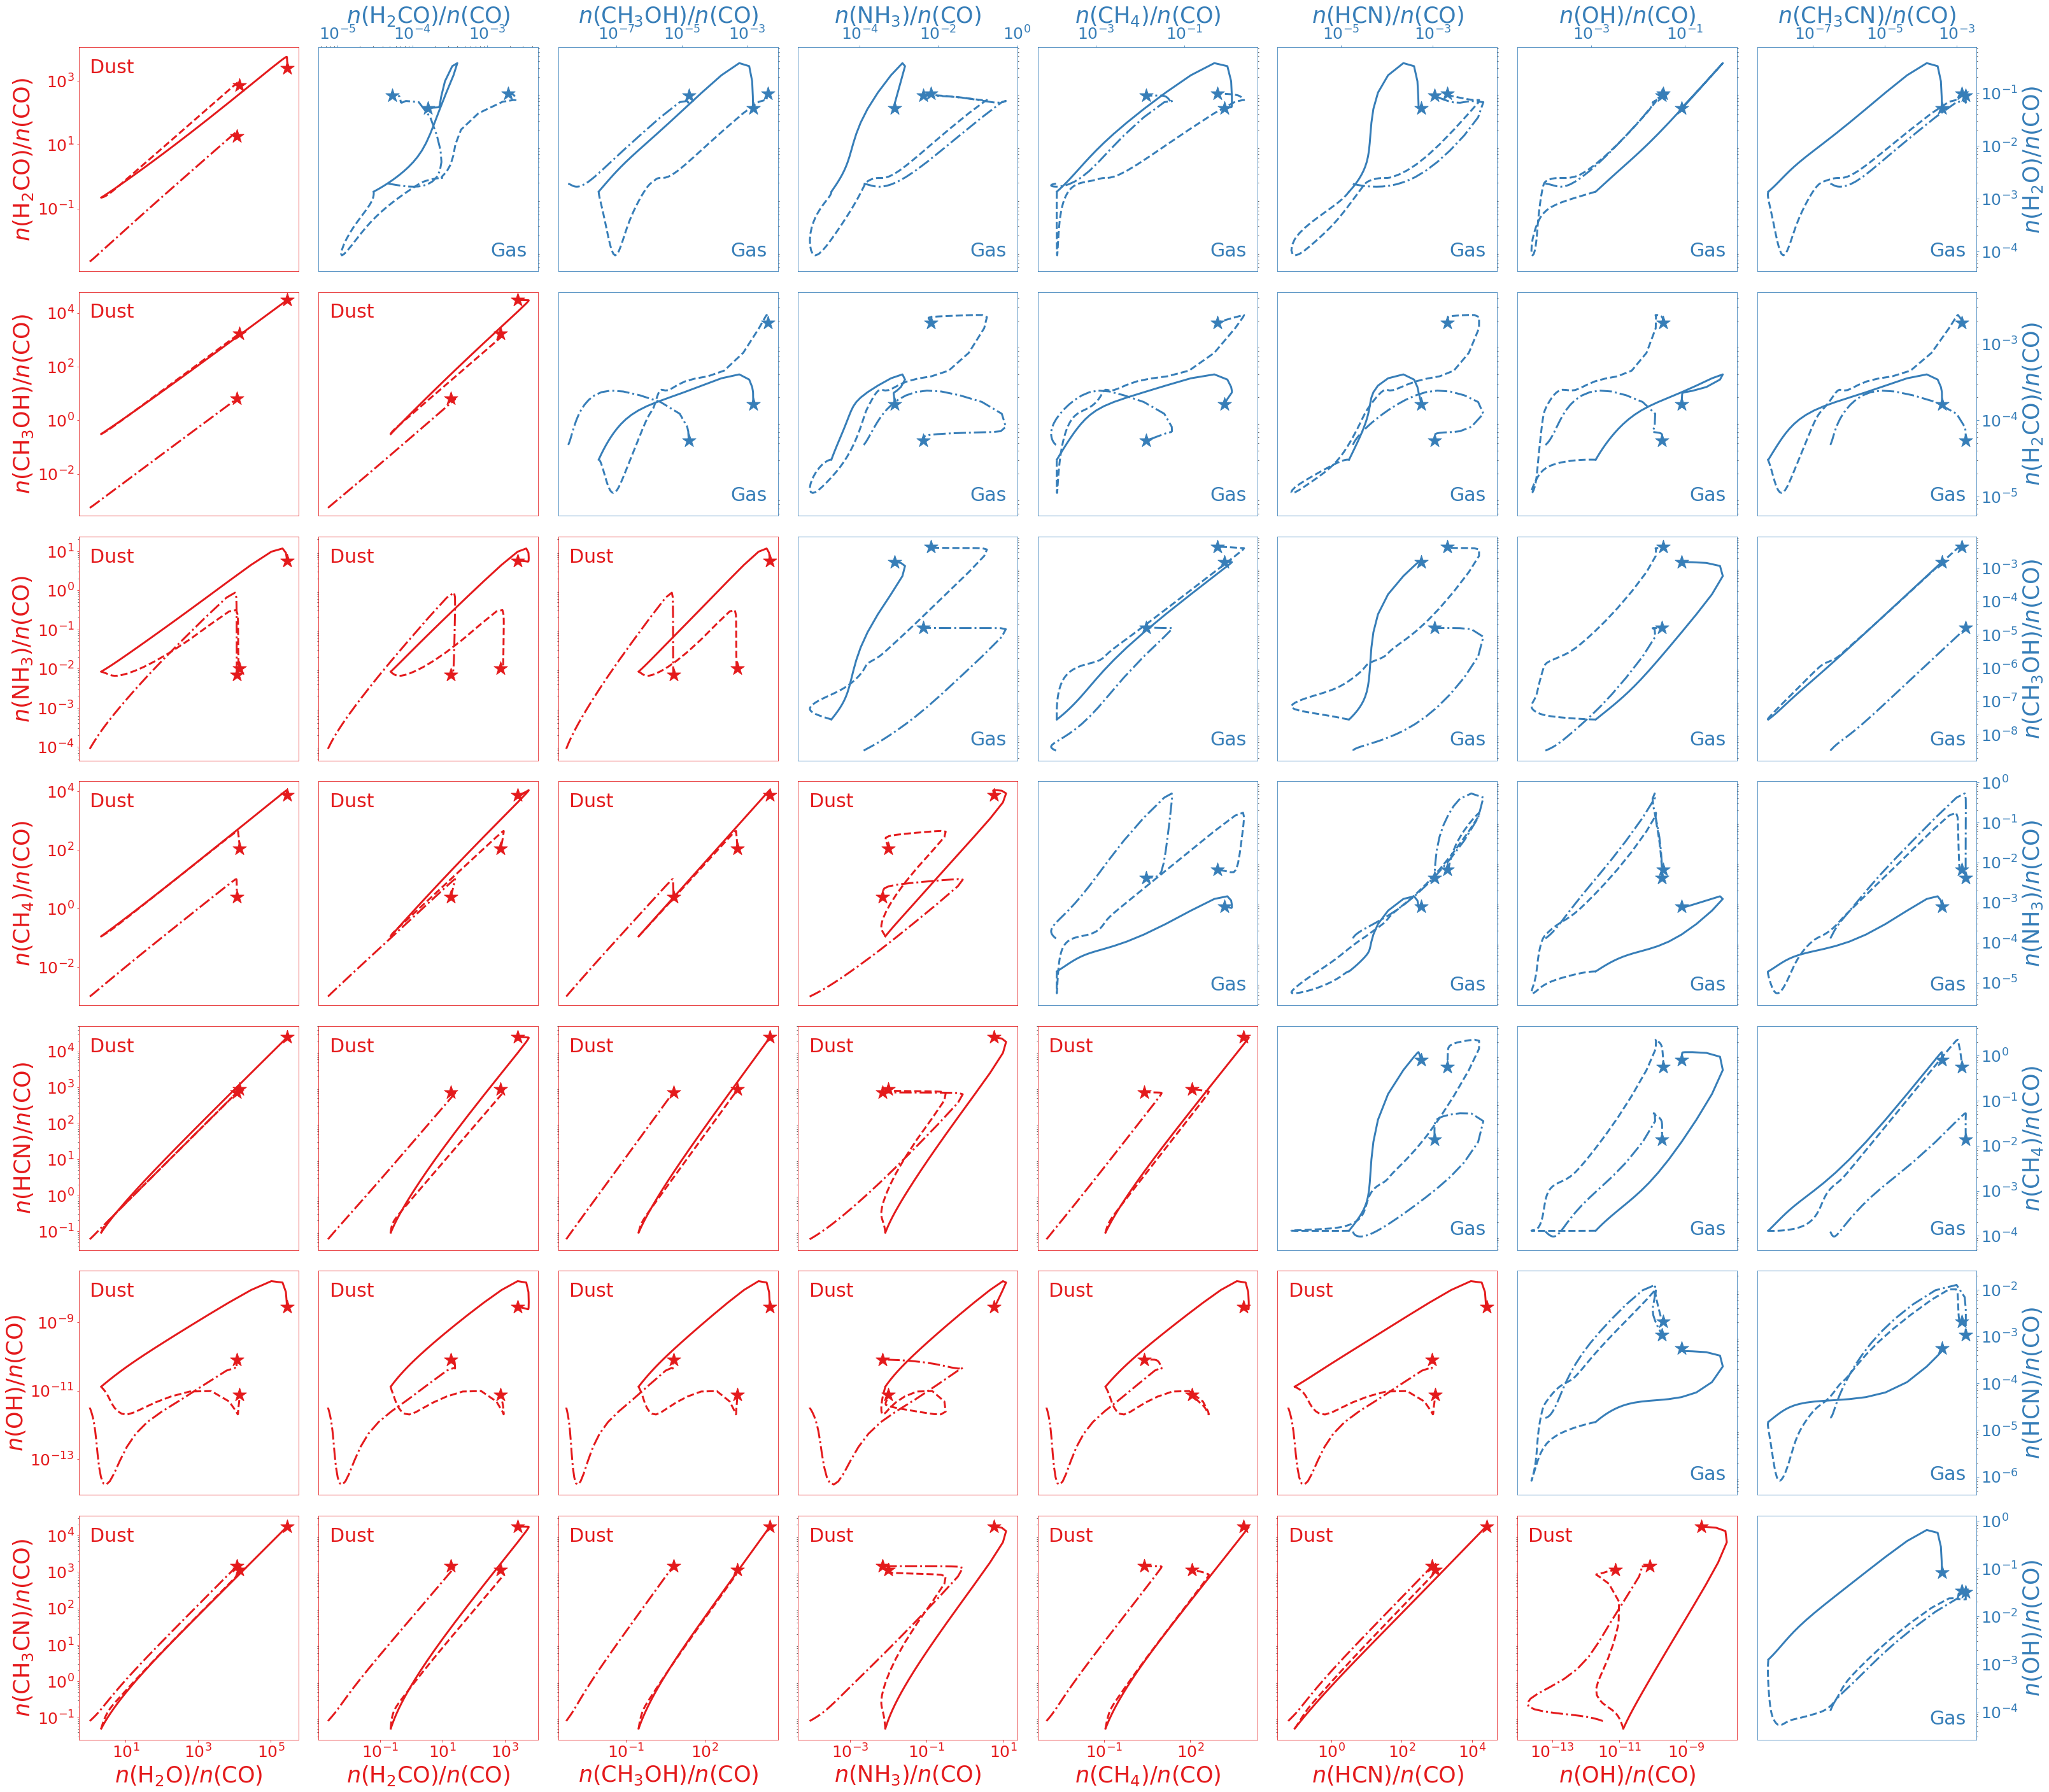

In [6]:
species = ['H2O', 'H2CO', 'CH3OH', 'NH3', 'CH4', 'HCN', 'OH', 'CH3CN']
species_DUST = [
    'H_DUSTH_DUSTO_DUST', 'H_DUSTH_DUSTC_DUSTO_DUST',
    'C_DUSTH_DUSTH_DUSTH_DUSTO_DUSTH_DUST', 'N_DUSTH_DUSTH_DUSTH_DUST',
    'C_DUSTH_DUSTH_DUSTH_DUSTH_DUST', 'H_DUSTC_DUSTN_DUST', 'O_DUSTH_DUST',
    'C_DUSTH_DUSTH_DUSTH_DUSTC_DUSTN_DUST'
]

l = len(species)
f, ax = plt.subplots(l - 1, l, figsize=(5.6 * l, 5.6 * (l - 1)))
for i in np.arange(l - 1):
    for j in np.arange(l):
        if (i < j):
            spe1, spe2 = species[j], species[i]
            label1, label2 = None, None
            plot_default(spe1=spe1,
                         spe2=spe2,
                         ax=ax[i, j],
                         color='#377eb8',
                         color_default='#377eb8',
                         label1=label1,
                         label2=label2,
                         div='CO',
                         tmin=1e6,
                         label='Gas')
            ax[i, j].yaxis.set_label_position("right")
            ax[i, j].yaxis.tick_right()
            ax[i, j].xaxis.set_label_position("top")
            ax[i, j].xaxis.tick_top()
            set_spine_color(ax[i,j], '#377eb8')
        else:
            spe1, spe2 = species_DUST[j], species_DUST[i + 1]
            label1, label2 = r'${}$'.format(latex_name(
                species[j])), r'${}$'.format(latex_name(species[i + 1]))
            plot_default(spe1=spe1,
                         spe2=spe2,
                         ax=ax[i, j],
                         color='#e41a1c',
                         color_default='#e41a1c',
                         label1=label1,
                         label2=label2,
                         div='CO',
                         tmin=1e6,
                         label='Dust')
            set_spine_color(ax[i,j], '#e41a1c')
            
            

        if (0 < i < l - 2 or (i == 0 and j == 0)
                or (i == l - 2 and j == l - 1)):
            ax[i, j].set_xticks([])
            ax[i, j].set_xlabel('')

        if (0 < j < l - 1):
            ax[i, j].set_yticks([])
            ax[i, j].set_ylabel('')
        ax[i, j].tick_params(labelsize=25)

plt.tight_layout()
plt.savefig('../../../Report/Fig/diagnostic_append.eps')

## CO diagnose

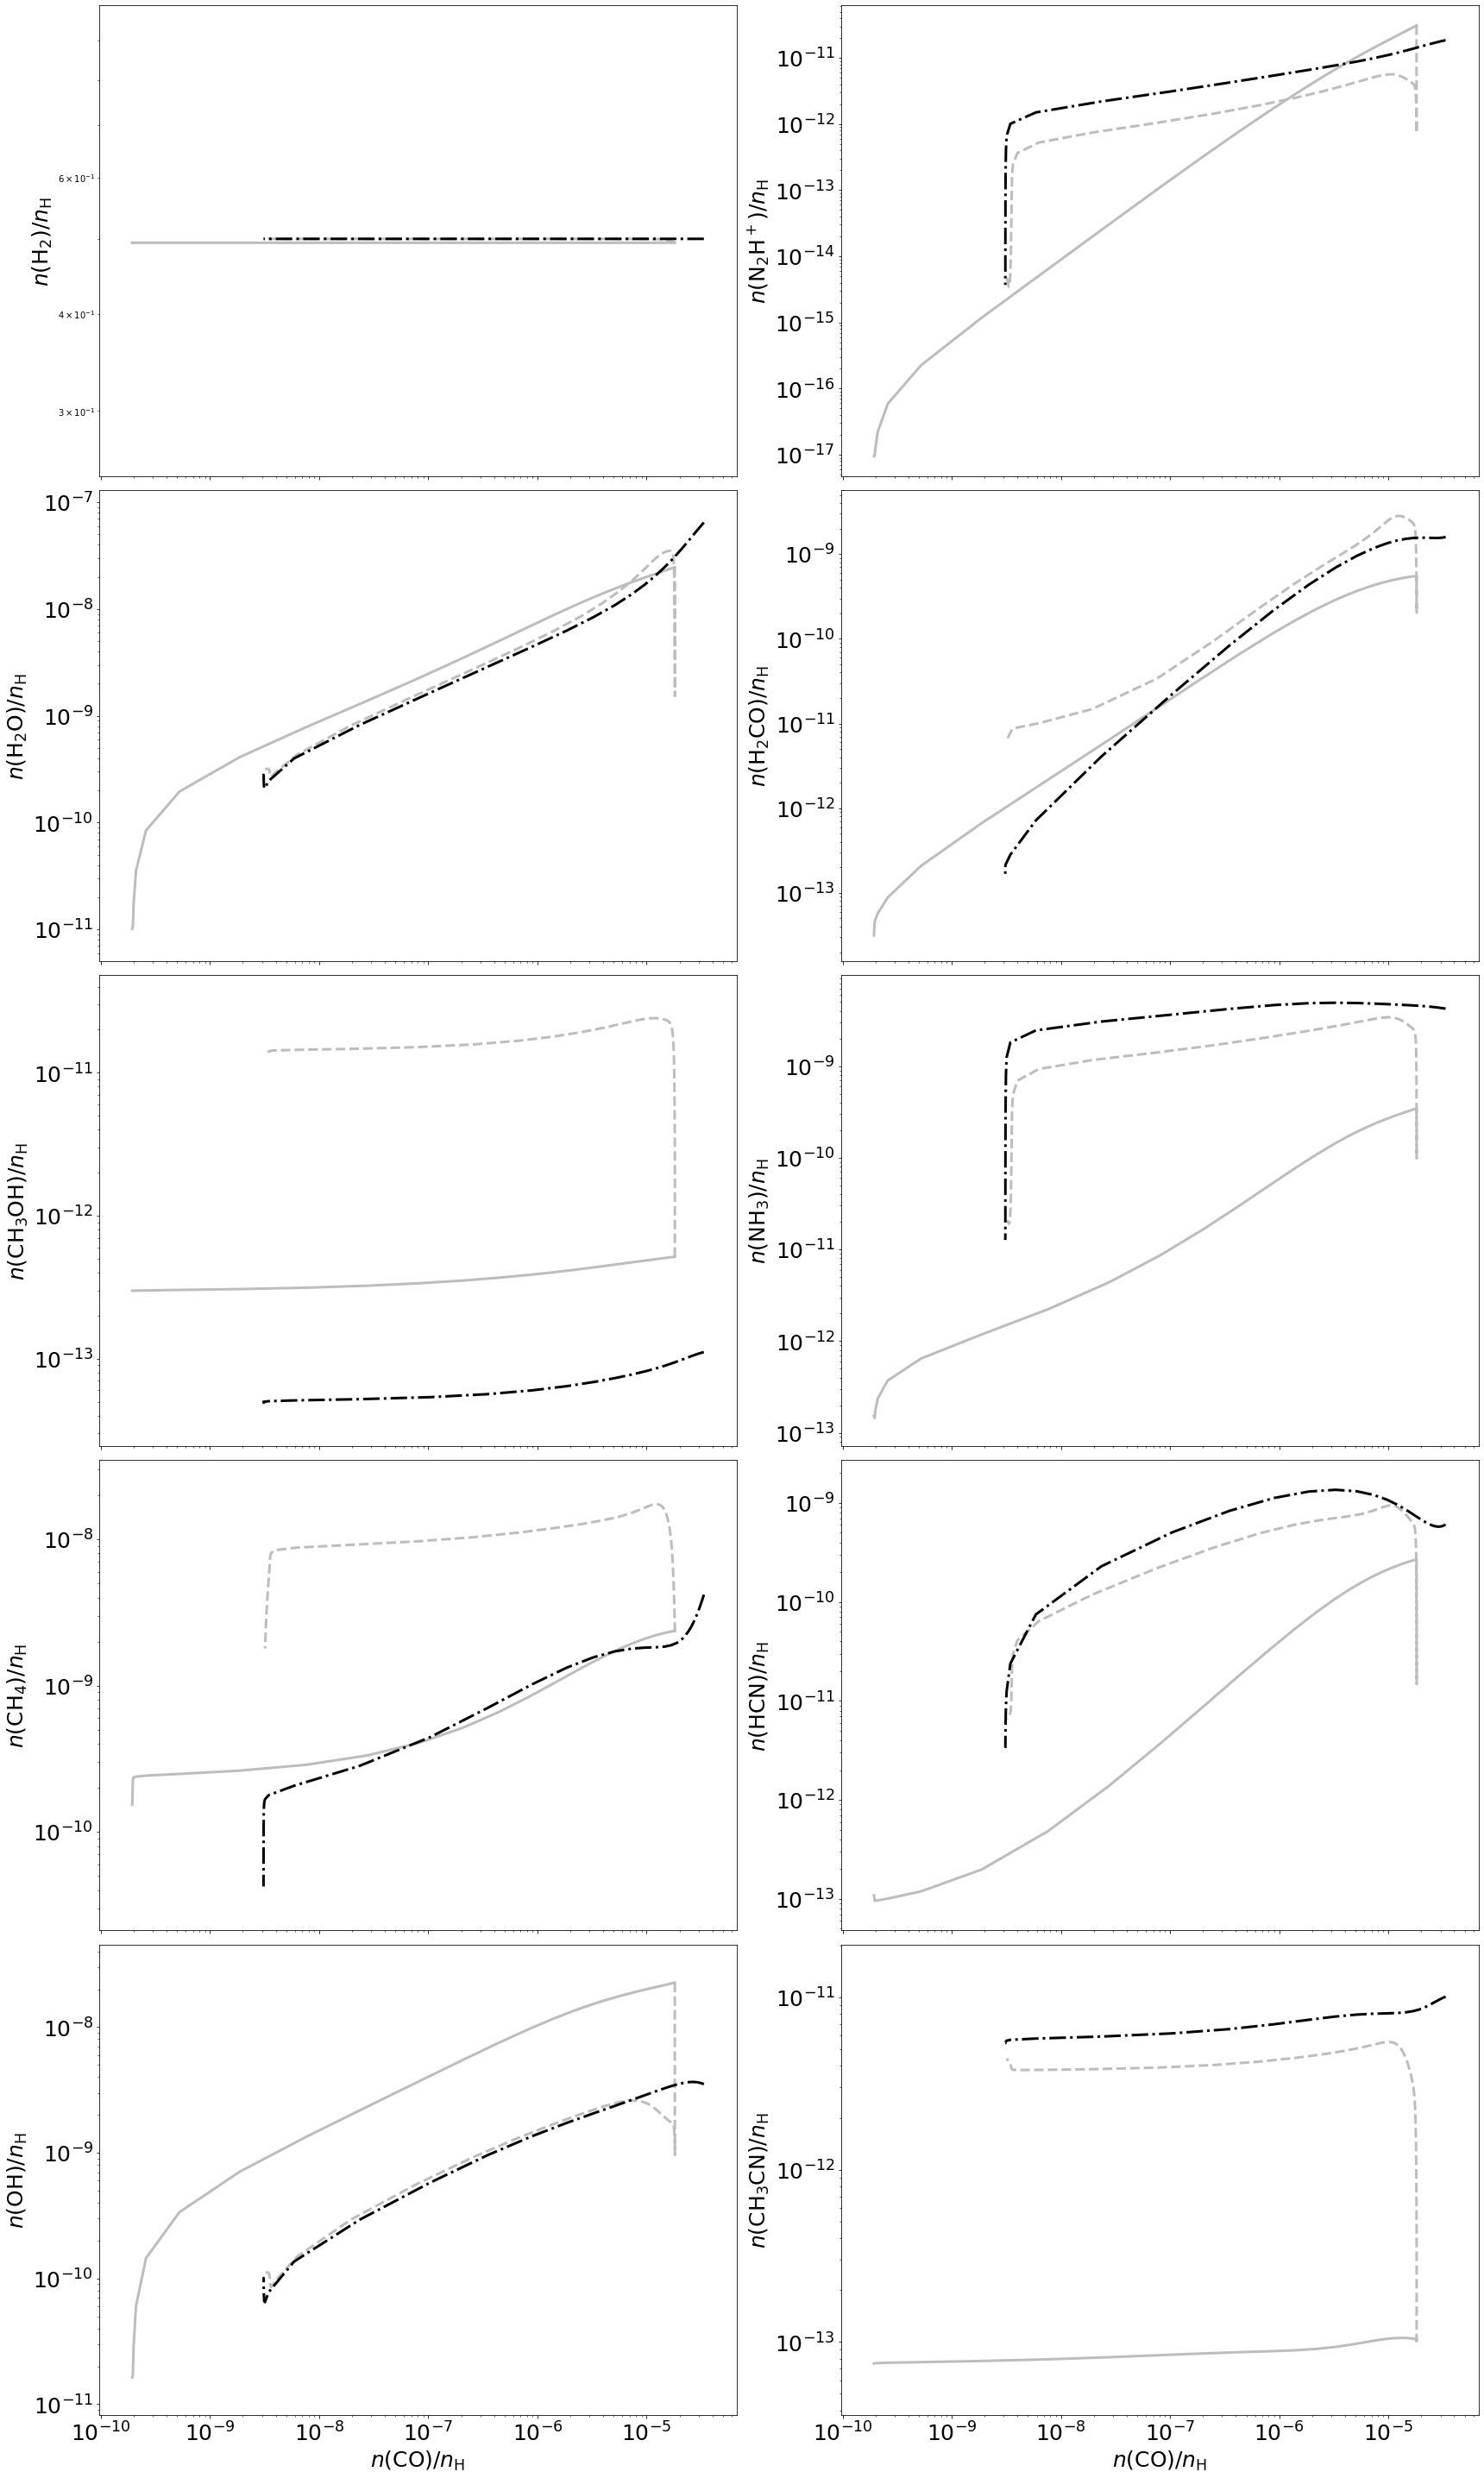

In [15]:
f, ax = plt.subplots(5, 2, figsize=(24, 40), sharex=True)
ax = ax.flatten()

species = [
    'H2', 'N2Hj', 'H2O', 'H2CO', 'CH3OH', 'NH3', 'CH4', 'HCN', 'OH', 'CH3CN'
]

for k, spe in enumerate(species):
    plot_default(spe2=spe, spe1='CO', ax=ax[k], color='#bdbdbd', tmin=1e6)

for k, a in enumerate(ax):
    a.tick_params(labelsize=25)
    if (k < len(species) - 2):
        a.set_xlabel('')
plt.tight_layout()

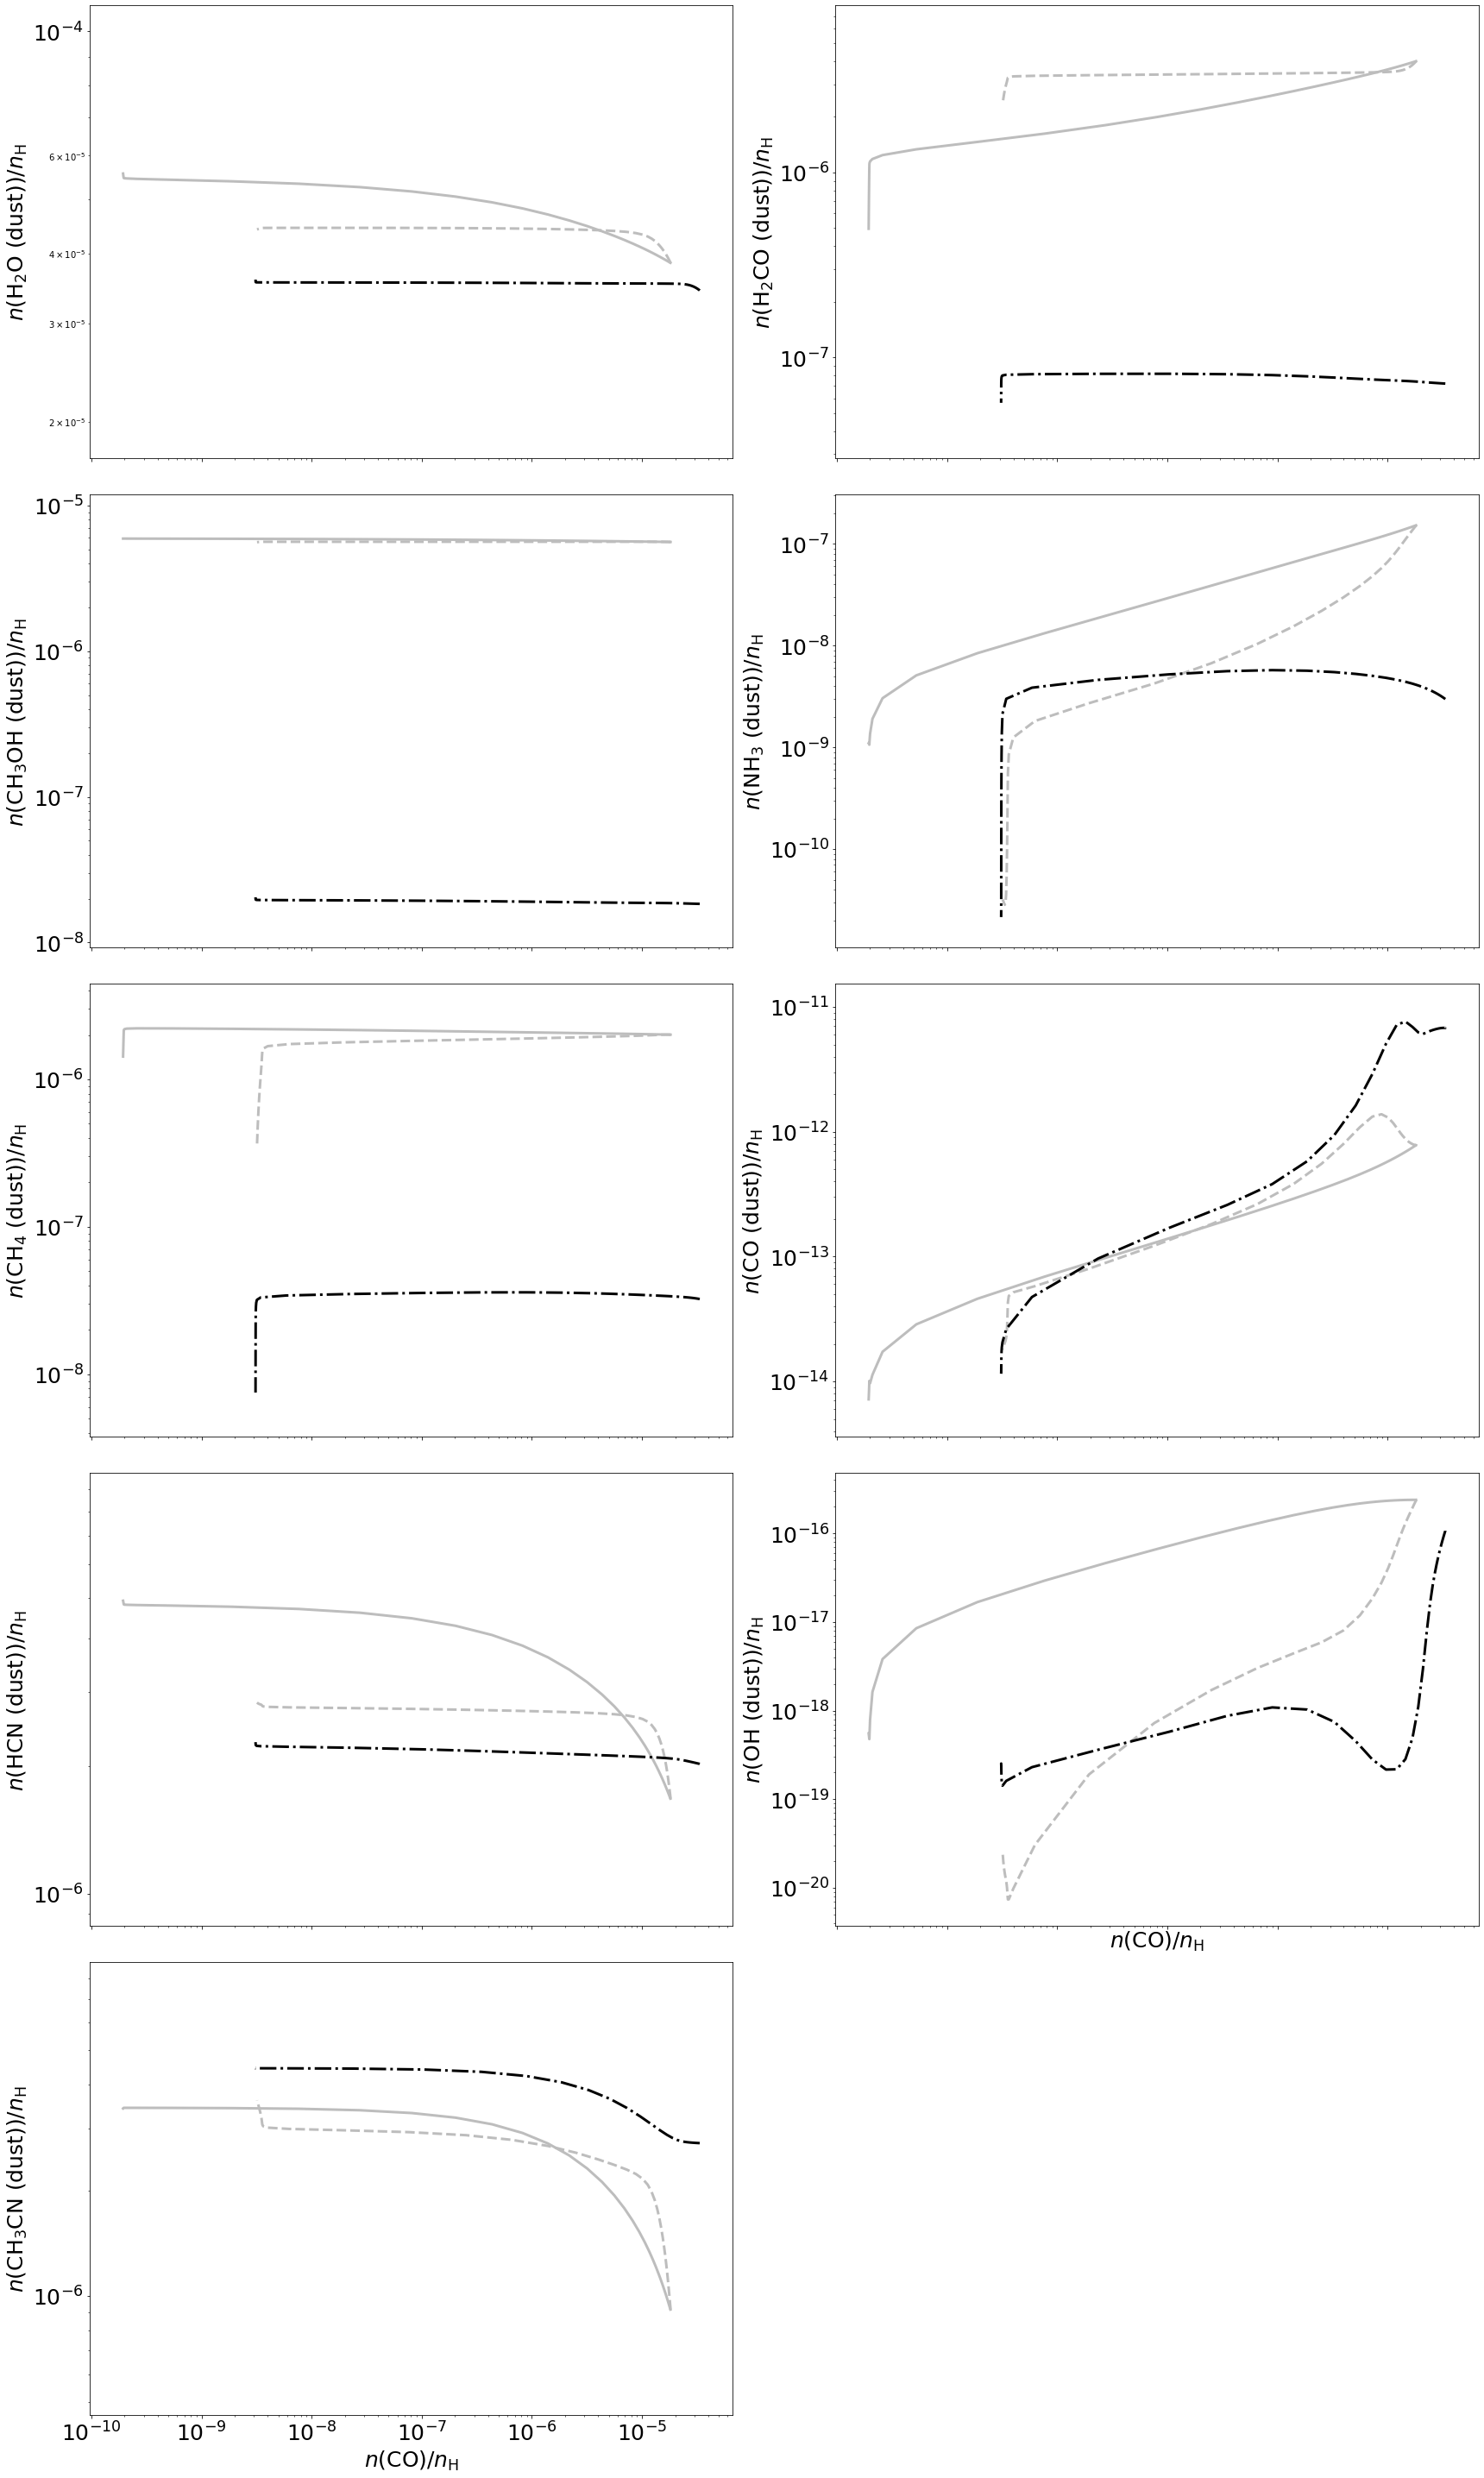

In [19]:
f, ax = plt.subplots(5, 2, figsize=(24, 40), sharex=True)
ax = ax.flatten()
species = ['H2O', 'H2CO', 'CH3OH', 'NH3', 'CH4', 'CO', 'HCN', 'OH', 'CH3CN']
species_DUST = [
    'H_DUSTH_DUSTO_DUST', 'H_DUSTH_DUSTC_DUSTO_DUST',
    'C_DUSTH_DUSTH_DUSTH_DUSTO_DUSTH_DUST', 'N_DUSTH_DUSTH_DUSTH_DUST',
    'C_DUSTH_DUSTH_DUSTH_DUSTH_DUST', 'C_DUSTO_DUST', 'H_DUSTC_DUSTN_DUST',
    'O_DUSTH_DUST', 'C_DUSTH_DUSTH_DUSTH_DUSTC_DUSTN_DUST'
]

for k, spe in enumerate(species_DUST):
    label2 = r'${}$ (dust)'.format(latex_name(species[k]))
    plot_default(spe2=spe,
                 spe1='CO',
                 ax=ax[k],
                 color='#bdbdbd',
                 label2=label2,
                 tmin=1e6)

for k, a in enumerate(ax):
    a.tick_params(labelsize=25)
    if (k < len(species) - 2):
        a.set_xlabel('')
f.delaxes(ax[-1])
plt.tight_layout()